In [ ]:
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/fintech HW/HW0916/Stocks_ClosePrice.csv'

import os
if not os.path.exists(file_path):
  print(f"檔案不存在: {file_path}")
else:
  stocks_data = pd.read_csv(file_path)

  print(stocks_data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Date          FB         GOOG        NFLX         AMZN        AAPL  \
0  2018/9/24  165.410004  1173.369995  369.609985  1934.359985  220.789993   
1  2018/9/25  164.910004  1184.650024  369.429993  1974.550049  222.190002   
2  2018/9/26  166.949997  1180.489990  377.880005  1974.849976  220.419998   
3  2018/9/27  168.839996  1194.640015  380.709991  2012.979980  224.949997   
4  2018/9/28  164.460007  1193.469971  374.130005  2003.000000  225.740005   

       FB.1    GOOG.1    NFLX.1    AMZN.1    AAPL.1  
0       NaN       NaN       NaN       NaN       NaN  
1 -0.003027  0.009567 -0.000487  0.020564  0.006321  
2  0.012294 -0.003518  0.022615  0.000152 -0.007998  
3  0.011257  0.011915  0.007461  0.019124  0.020343  
4 -0.026284 -0.000980 -0.017435 -0.004970  0.003506  


Find the mean and standard deviation of returns of these five stocks.

Plot the mean and risk (standard deviation) for these five returns using red starts in the 2-dimensional plane.

<ipython-input-4-1e8e78d934db>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(std_returns[i], mean_returns[i], stock, fontsize=12)


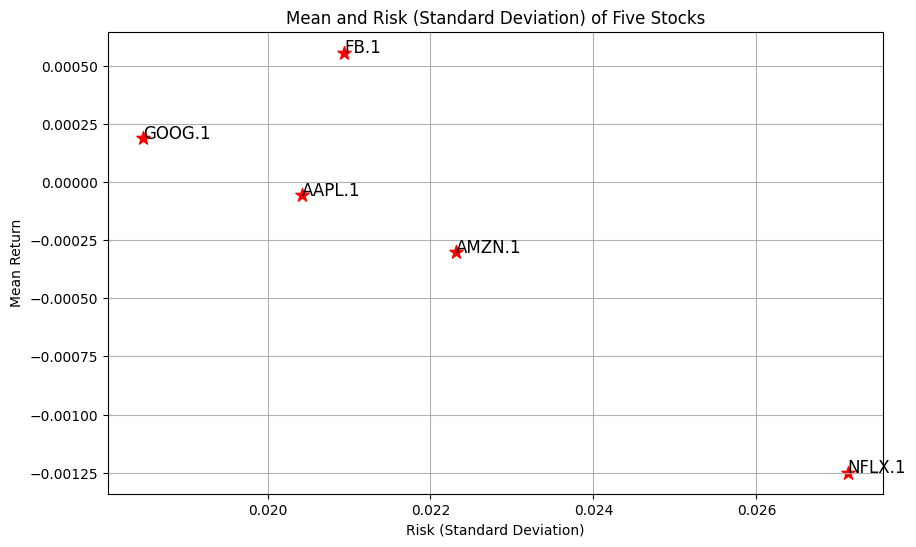

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

returns = stocks_data[['FB.1', 'GOOG.1', 'NFLX.1', 'AMZN.1', 'AAPL.1']]

mean_returns = returns.mean()
std_returns = returns.std()

plt.figure(figsize=(10, 6))
plt.scatter(std_returns, mean_returns, color='red', marker='*', s=100)
for i, stock in enumerate(returns.columns):
    plt.text(std_returns[i], mean_returns[i], stock, fontsize=12)
plt.title('Mean and Risk (Standard Deviation) of Five Stocks')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Return')
plt.grid(True)
plt.show()


Randomly selected weights so that each weight is nonnegative and sums up to one. Print the random weight, the mean and standard deviation of the portfolio.

Repeat c) for 1000 times, and plot the mean and standard deviation for these artificial portfolios using blue points in the 2-dimensional plane in b).

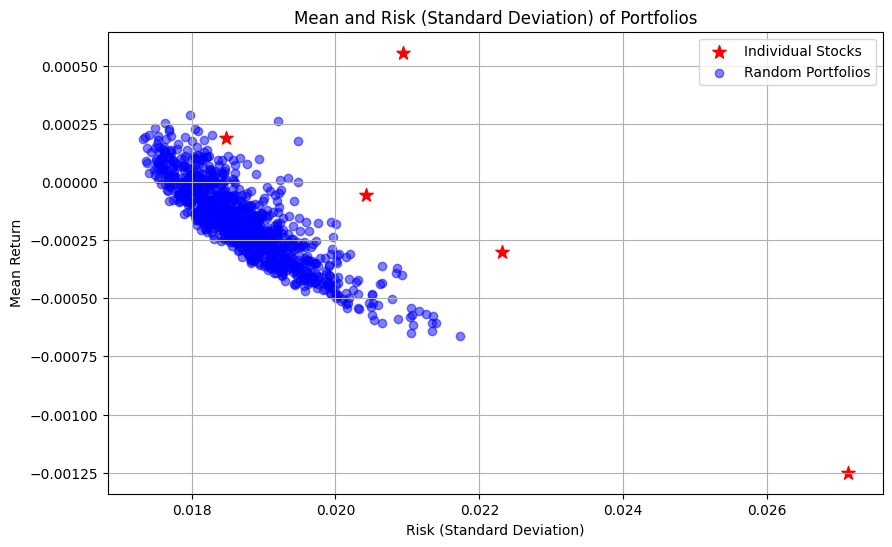

In [ ]:
num_portfolios = 1000
num_assets = len(returns.columns)

portfolio_means = []
portfolio_stds = []

for _ in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    portfolio_means.append(portfolio_return)
    portfolio_stds.append(portfolio_std)

plt.figure(figsize=(10, 6))
plt.scatter(std_returns, mean_returns, color='red', marker='*', s=100, label='Individual Stocks')
plt.scatter(portfolio_stds, portfolio_means, color='blue', alpha=0.5, label='Random Portfolios')
plt.title('Mean and Risk (Standard Deviation) of Portfolios')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Return')
plt.grid(True)
plt.legend()
plt.show()


Draw the efficiency frontier in the figure of b), assuming that no short sales are allowed.

Check if the efficiency frontier in e) is the envelope line of the blue points in d).

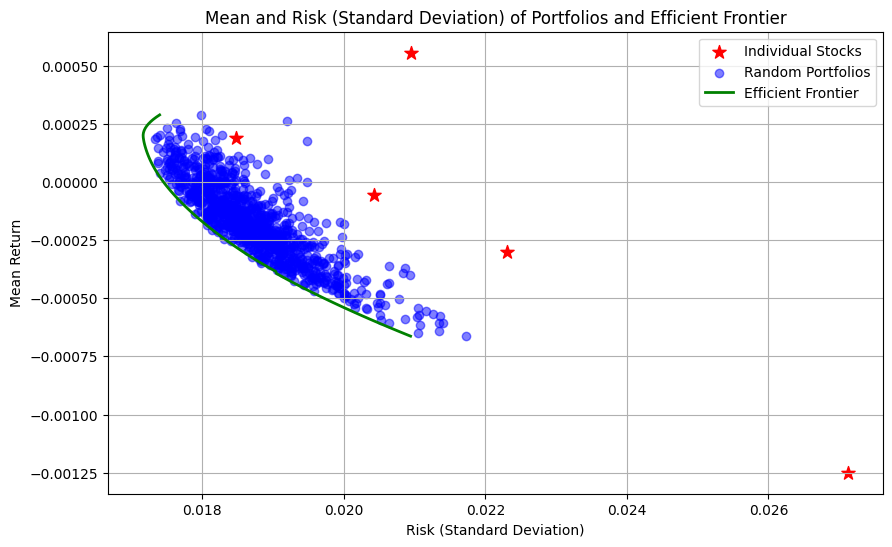

In [ ]:
from scipy.optimize import minimize

def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_std

def minimize_risk(weights, mean_returns, cov_matrix, target_return):
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # 確保權重和為1
            {'type': 'eq', 'fun': lambda x: portfolio_performance(x, mean_returns, cov_matrix)[0] - target_return})  # 目標回報
    bounds = [(0, 1) for _ in range(num_assets)]  # 禁止空頭
    result = minimize(lambda x: portfolio_performance(x, mean_returns, cov_matrix)[1],
                      num_assets * [1. / num_assets], method='SLSQP', bounds=bounds, constraints=cons)
    return result.x

target_returns = np.linspace(min(portfolio_means), max(portfolio_means), 100)
cov_matrix = returns.cov()
efficient_frontier_stds = []

for target_return in target_returns:
    optimal_weights = minimize_risk(mean_returns, mean_returns, cov_matrix, target_return)
    _, optimal_std = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
    efficient_frontier_stds.append(optimal_std)

plt.figure(figsize=(10, 6))
plt.scatter(std_returns, mean_returns, color='red', marker='*', s=100, label='Individual Stocks')
plt.scatter(portfolio_stds, portfolio_means, color='blue', alpha=0.5, label='Random Portfolios')
plt.plot(efficient_frontier_stds, target_returns, color='green', linewidth=2, label='Efficient Frontier')
plt.title('Mean and Risk (Standard Deviation) of Portfolios and Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Return')
plt.grid(True)
plt.legend()
plt.show()
